Ian Soede, Nicolas Salvan

# Control theory and Vicsek Model 

## Introduction

---
In this file, you will find data visualisation of different simulations. 

## Library import

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from IPython.display import Video, display


In [2]:
# Import models 
import models.vicsek as vicsek

import utils
import animation.Animator2D as Animator2D
import animation.MatplotlibAnimator as MatplotlibAnimator

## 0. Lauching a simulation

In [3]:
# Initialize the Vicsek model.
simulator = vicsek.Vicsek(domainSize=(50,50), numberOfParticles=50)
# Simulate the Vicsek model.
simulationData = simulator.simulate()

# Extract the simulation data.
time, positions, orientations = simulationData[0], simulationData[1], simulationData[2]

In [4]:
print(time.shape)
print(positions.shape)
print(orientations.shape)

(1001,)
(1001, 50, 2)
(1001, 50, 2)


In [5]:
df = utils.simulationDataToDataframe(simulationData)

In [6]:
df.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_45,theta_y_45,theta_x_46,theta_y_46,theta_x_47,theta_y_47,theta_x_48,theta_y_48,theta_x_49,theta_y_49
0,0.0,49.119768,2.743360,43.726708,37.451254,7.037295,8.225646,12.359826,13.607568,0.943385,...,0.627798,-0.778376,0.128095,-0.991762,0.413849,0.910345,-0.937146,0.348937,0.941488,0.337047
1,0.5,48.882752,3.183614,43.934942,37.905829,7.161597,7.741343,11.915490,13.378297,1.440394,...,0.598412,-0.801188,-0.202146,-0.979355,0.117844,0.993032,-0.994347,0.106178,0.934811,0.355147
2,1.0,48.740158,3.662850,44.299378,38.248154,7.305499,7.262499,11.416071,13.354205,1.934876,...,0.496166,-0.868228,-0.463553,-0.886069,0.089656,0.995973,-0.986891,-0.161388,0.654459,0.756098
3,1.5,48.716132,4.162272,44.789452,38.347290,7.422740,6.776438,11.079148,13.723641,2.411962,...,0.522815,-0.852446,-0.527214,-0.849732,0.050652,0.998716,-0.902496,-0.430697,0.997236,0.074300
4,2.0,48.626804,4.654228,45.289439,38.343672,7.586319,6.303953,10.680618,14.025592,2.911947,...,0.223383,-0.974731,-0.784011,-0.620747,0.234249,0.972177,-0.962062,-0.272831,0.906496,0.422215


### Animation of the simulation

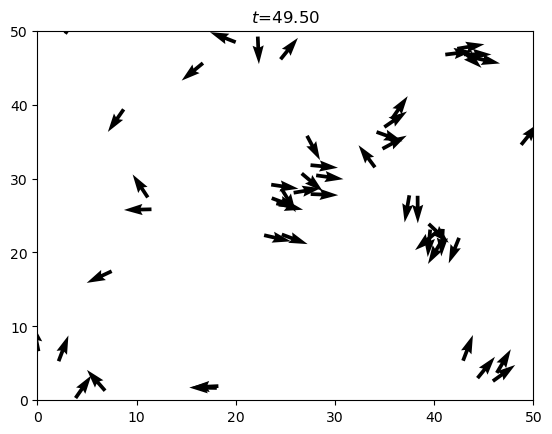

In [26]:
# Initialize the Matplotanimator and feed the simulation data and domain size.
animator = MatplotlibAnimator.MatplotlibAnimator(simulationData, (50,50))
# Prepare the animator for a 2D representation.
preparedAnimator = animator.prepare(Animator2D.Animator2D())
preparedAnimator.saveAnimation('data/vicsek3.mp4')

In [27]:
display(Video('data/vicsek3.mp4', embed=False))

## Part 1 : Bird path 

### Bird position over time

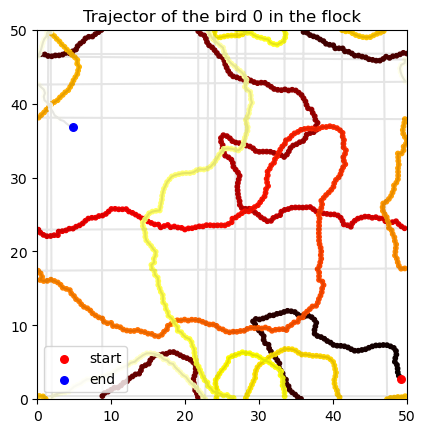

In [11]:
def plot_bird_path(df, i):

    """
    Plot the travelled path of the bird.
    """
    L = 50
    bird_x, bird_y = 'x'+str(i),'y'+str(i)
    x, y = df[[bird_x, bird_y]].to_numpy().transpose()
    fig, ax = plt.subplots()
    ax.scatter(x, y, s=10, 
             c=np.arange(len(x)), cmap='hot') 
    ax.scatter(x[0], y[0], s=30, 
             c='red', label='start') #startpoint
    ax.scatter(x[-1], y[-1], s=30, 
             c='blue', label='end') #endpoints
    ax.set_title(f'Trajector of the bird {i} in the flock')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect(True)
    ax.plot(x, y, c='k', alpha=0.1)
    ax.legend()
    plt.show()
plot_bird_path(df, 0)

### Bird orientation over time 

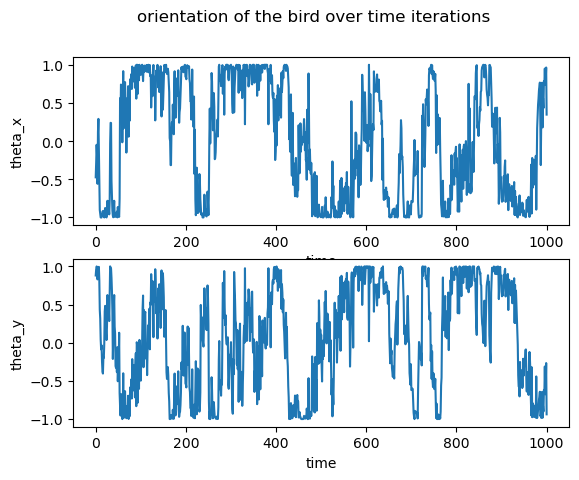

In [12]:
def plot_bird_orientation(df, i):

    """
    Plot the travelled path of the bird.
    """
    L = 0
    bird_x, bird_y = 'theta_x_'+str(i), 'theta_y_'+str(i)
    x, y = df[[bird_x, bird_y]].to_numpy().transpose()
    fig, axs = plt.subplots(2)
    fig.suptitle('orientation of the bird over time iterations')
    axs[0].plot(x, label="theta_x")
    axs[1].plot(y, label="theta_y")
    axs[0].set(xlabel="time", ylabel="theta_x")
    axs[1].set(xlabel="time", ylabel="theta_y")
    plt.show()
plot_bird_orientation(df, 0)

### Phase portrait of orientation 

In [13]:
# TODO 

### Highlight a bird in a video, trajectory in the video 

In [14]:
## TODO but seems useless so I'll do it last

## 2. Controller plots

In [15]:
## TO DO 

## 3. Plot the simulation at some time 

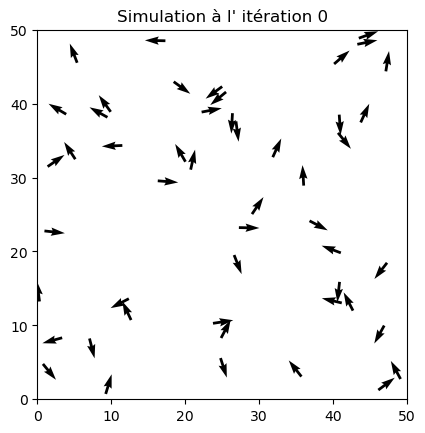

In [16]:
def plot_simulation(df, i, dt):

    """
    Plot the travelled path of the bird.
    """
    L = 50
    x,y = 4,2
    df_pos = utils.extract_positions_from_dataframe(df).iloc[i]
    df_orient = utils.extract_orientations_from_dataframe(df).iloc[i]

    n_bird = len(df_pos)//2
    
    list_pos = df_pos.to_numpy().reshape((n_bird, 2))
    list_orient = df_orient.to_numpy().reshape((n_bird, 2))

    x, y = list_pos[:,0], list_pos[:,1]
    theta_x, theta_y = list_orient[:,0], list_orient[:,1]

    fig, ax = plt.subplots()
    ax.quiver(x,y,theta_x,theta_y)
    ax.set_title(f'Simulation à l\' itération {i}')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_aspect(True)
    plt.show()

plot_simulation(df, 0, 0.5)

## 4. Average behaviour of the flock

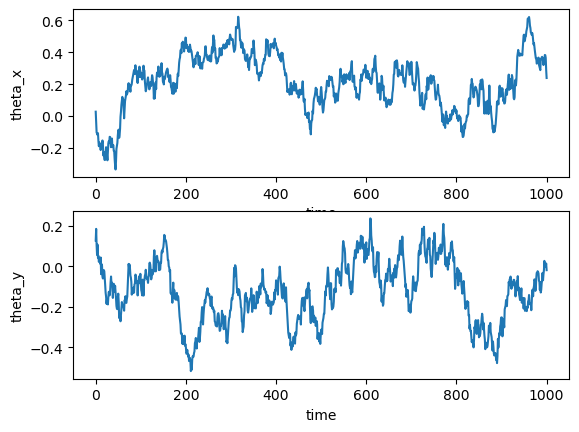

In [17]:
def plot_average_orientation(df):
    df_orient = utils.extract_orientations_from_dataframe(df)
    theta_x = df_orient.filter(like="theta_x").to_numpy()
    theta_y = df_orient.filter(like="theta_y").to_numpy()
    theta_x_mean = np.mean(theta_x, axis=1)
    theta_y_mean = np.mean(theta_y, axis=1)
    fig, axs = plt.subplots(2)
    axs[0].plot(theta_x_mean, label="theta_x")
    axs[1].plot(theta_y_mean, label="theta_y")
    axs[0].set(xlabel="time", ylabel="theta_x")
    axs[1].set(xlabel="time", ylabel="theta_y")
    plt.show()

plot_average_orientation(df)

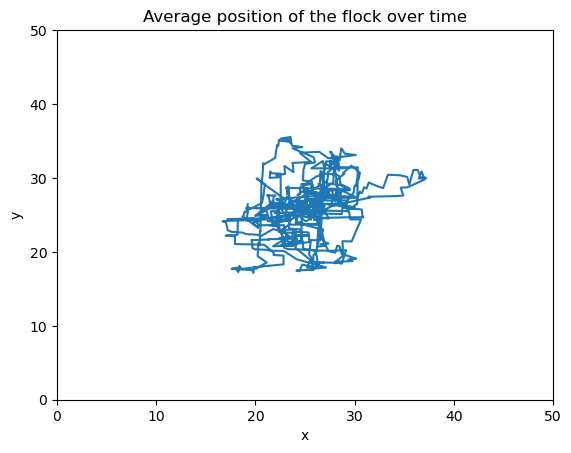

In [18]:
def plot_average_position(df):
    L = 50
    df_pos = utils.extract_positions_from_dataframe(df)
    x = df_pos.filter(like="x").to_numpy()
    y = df_pos.filter(like="y").to_numpy()
    x_mean = np.mean(x, axis=1)
    y_mean = np.mean(y, axis=1)
    fig, ax = plt.subplots()
    ax.plot(x_mean, y_mean)
    ax.set_title('Average position of the flock over time')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    plt.show()

plot_average_position(df)


## Order factor and other coefficients 

In [19]:
import scipy.integrate as spi

In [20]:
def order_factor(df):
    df_orient = utils.extract_orientations_from_dataframe(df)

    
    df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)
    return df_orient['order_factor']


def stationnary_order_factor(df):
    tmax = df['t'].iloc[-1]
    print(tmax)
    df_order = order_factor(df)
    order = df_order.to_numpy()
    x = np.linspace(0, tmax, len(order))
    int_order = spi.simpson(order, x=x) 
    return int_order/tmax


# TESTS 
stationnary_order_factor(df)


500.0


C:\Users\nicos\AppData\Local\Temp\ipykernel_100668\1028860965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)


0.3089040647808822

C:\Users\nicos\AppData\Local\Temp\ipykernel_100668\1028860965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orient['order_factor'] = np.sqrt(df_orient.filter(like="theta_x").mean(axis=1)**2 + df_orient.filter(like="theta_y").mean(axis=1)**2)


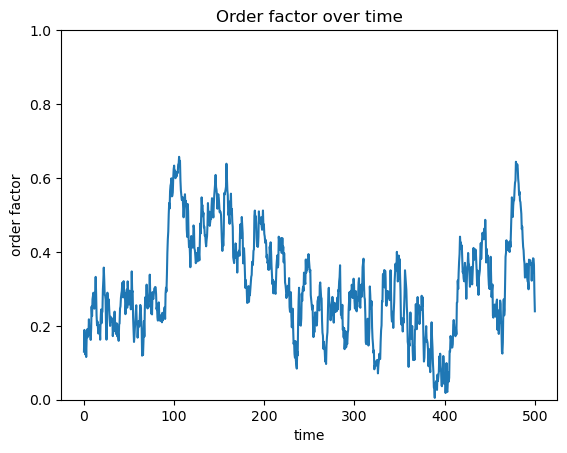

In [21]:

def plot_order_factor(df):
    df_order = order_factor(df)
    order = df_order.to_numpy()
    fig, ax = plt.subplots()
    ax.plot(df['t'], order)
    plt.title('Order factor over time')
    plt.xlabel('time')
    plt.ylabel('order factor')
    plt.ylim(0, 1)
    plt.show()
    

plot_order_factor(df)

